<a href="https://colab.research.google.com/github/sameredit/discogsvinyls-CD/blob/main/DiscogspartI_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title
Trend of vinyl and CD prediction



### By:
Samer Ahmad Diaz

### Date:
2024-11-28

### Description:

In order to figure out hte market of turnatables and CDs, looking into the trand vinyl and CD sales is an idea.
- How may vinyls and CD were released per yeard from 1995 to 2000
- Is there a correlation between vinyl records and CD.
- What is the forecast for the vinyl and CD released through 2025



## 📚 Import  libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import linregress

## 💾 Load data

In [ ]:
df=pd.read_csv('/content/release_data_styles.csv')
df.head()

,release_id,country,year,genre,style,format
0,1,Sweden,1999.0,Electronic,Deep House,Vinyl
1,2,Sweden,1998.0,Electronic,Broken Beat,Vinyl
2,2,Sweden,1998.0,Electronic,Techno,Vinyl
3,2,Sweden,1998.0,Electronic,Tech House,Vinyl
4,3,US,1999.0,Electronic,Techno,CD


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31257071 entries, 0 to 31257070
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   release_id  int64  
 1   country     object 
 2   year        float64
 3   genre       object 
 4   style       object 
 5   format      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [ ]:
df["release_id"].value_counts()

,count
release_id,
2779966,2912
15112786,2048
3331541,2016
11391474,2016
11207632,1760
...,...
7105789,1
7105787,1
7105785,1


In [ ]:
df["country"].value_counts()

,count
country,
US,7014807
UK,3750271
Germany,2626630
France,1506822
Japan,1424084
...,...
Chad,4
"Micronesia, Federated States of",4
Gaza Strip,2


In [ ]:
df["year"].value_counts()

,count
year,
2016.0,827806
2012.0,814333
2017.0,805624
2015.0,805219
2013.0,801459
...,...
2021.0,4
1889.0,2
1860.0,1


In [ ]:


# 1. Extract the year part (if necessary)
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')  # Extract 4 digits

# 2. Convert to integer
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')  # Convert to nullable integer

# 3. Remove rows with invalid years (optional)
df = df[df['year'].notna()]

In [ ]:
df["year"].value_counts()

,count
year,
2016,827806
2012,814333
2017,805624
2015,805219
2013,801459
...,...
2021,4
1889,2
1860,1


In [ ]:
df["genre"].value_counts()

,count
genre,
Rock,7344232
Electronic,7030233
Pop,3733918
"Folk, World, & Country",1814196
Jazz,1589487
Funk / Soul,1577892
Hip Hop,1121093
Classical,823871
Latin,717698


In [ ]:
df["format"].value_counts()

,count
format,
CD,10699846
Vinyl,10651356
File,3171396
Cassette,2110064
DVD,341762
Shellac,234792
Box Set,232879
All Media,138300
VHS,66013


In [ ]:
# Create data frames for vinyl and CD. The time period is set in between 2000 and 2019.
data_v=df[(df['format']=='Vinyl')&((df['year']>=2000.0)&(df['year']<2020.0))]
data_c=df[(df['format']=='CD')&((df['year']>=2000.0)&(df['year']<2020.0))]

In [ ]:
# duplicates data vinyls
duplicates=data_v.duplicated(subset=['release_id'], keep=False)
print(data_v[duplicates].sort_values(by='release_id').head(10))

    release_id country  year       genre              style format
15           9      US  2000  Electronic              House  Vinyl
16           9      US  2000  Electronic         Deep House  Vinyl
23          15      US  2000  Electronic              House  Vinyl
24          15      US  2000  Electronic         Deep House  Vinyl
25          16      US  2000  Electronic             Techno  Vinyl
26          16      US  2000  Electronic         Tech House  Vinyl
30          18      US  2000  Electronic             Techno  Vinyl
31          18      US  2000  Electronic         Tech House  Vinyl
32          19  Canada  2000  Electronic  Progressive House  Vinyl
33          19  Canada  2000  Electronic              House  Vinyl


In [ ]:
# remove duplicates data fro vinyls
data_v_dedu=data_v.drop_duplicates(subset=['release_id'], keep='first')
print(data_v_dedu.head(10))

    release_id country  year       genre              style format
13           7      US  2000  Electronic         Deep House  Vinyl
14           8      US  2000  Electronic         Deep House  Vinyl
15           9      US  2000  Electronic              House  Vinyl
20          13      US  2000  Electronic         Deep House  Vinyl
23          15      US  2000  Electronic              House  Vinyl
25          16      US  2000  Electronic             Techno  Vinyl
30          18      US  2000  Electronic             Techno  Vinyl
32          19  Canada  2000  Electronic  Progressive House  Vinyl
35          20      US  2000  Electronic         Tech House  Vinyl
36          21      UK  2000  Electronic        Deep Techno  Vinyl


In [ ]:
# duplicates data CD
duplicates=data_c.duplicated(subset=['release_id'], keep=False)
print(data_c[duplicates].sort_values(by='release_id').head(10))

     release_id country  year       genre         style format
83           56      US  2000  Electronic         House     CD
84           56      US  2000  Electronic  Garage House     CD
452         284      US  2000  Electronic         House     CD
453         284      US  2000  Electronic        Techno     CD
454         284      US  2000  Electronic     Downtempo     CD
492         297      UK  2000  Electronic      Abstract     CD
493         297      UK  2000  Electronic           IDM     CD
494         297      UK  2000  Electronic       Ambient     CD
519         313      US  2000  Electronic        Techno     CD
520         313      US  2000  Electronic       Electro     CD


In [ ]:
# remove duplicates data for CD
data_c_dedu=data_c.drop_duplicates(subset=['release_id'], keep='first')
print(data_c_dedu.head(10))

     release_id  country  year       genre      style format
57           36       US  2000  Electronic     Trance     CD
83           56       US  2000  Electronic      House     CD
452         284       US  2000  Electronic      House     CD
474         293       UK  2000  Electronic  Leftfield     CD
492         297       UK  2000  Electronic   Abstract     CD
519         313       US  2000  Electronic     Techno     CD
521         314  Germany  2000  Electronic   Abstract     CD
524         315  Belgium  2000  Electronic   Abstract     CD
551         324       UK  2000  Electronic   Abstract     CD
554         325       UK  2000  Electronic  Leftfield     CD


release_id        0
country       21378
year              0
genre             0
style         99051
format            0
dtype: int64


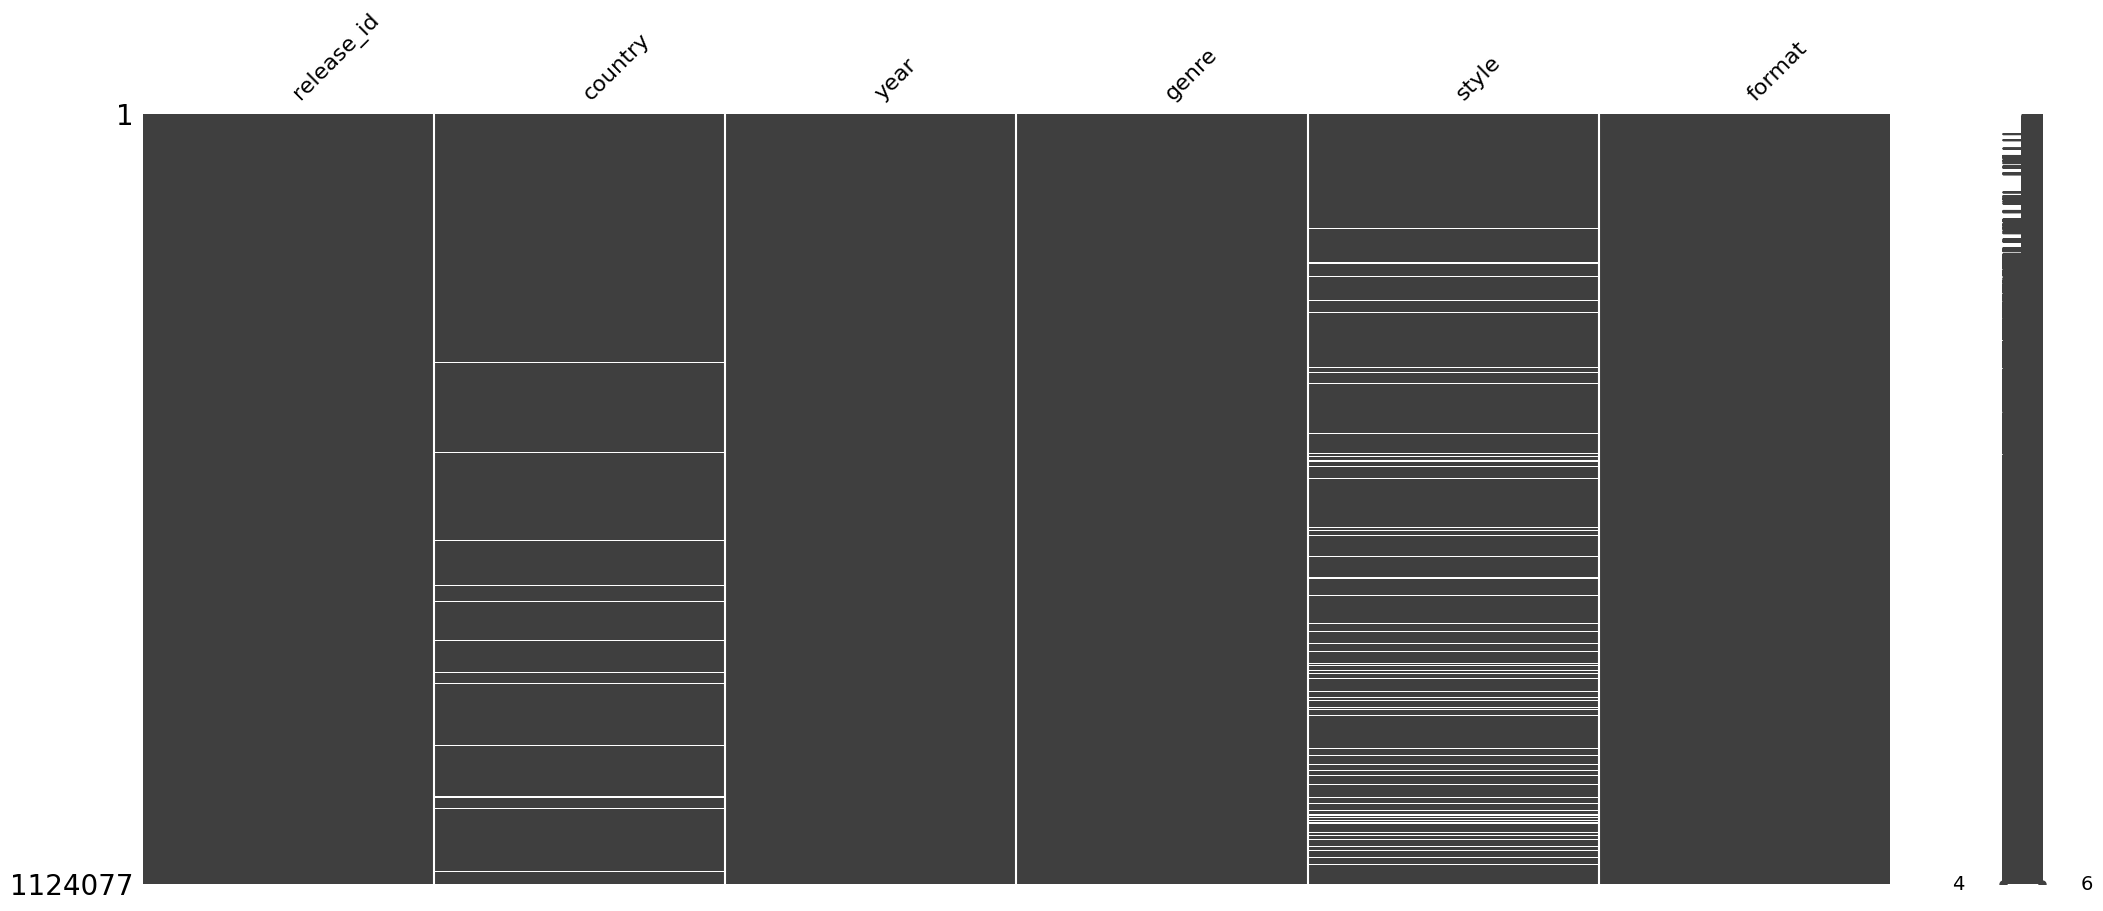

In [ ]:
# investigate if there is a missing value in the format column of the vinyl collections (It seems good)
print(data_v_dedu.isna().sum())
msno.matrix(data_v_dedu)
plt.show()

release_id         0
country        43555
year               0
genre              0
style         475186
format             0
dtype: int64


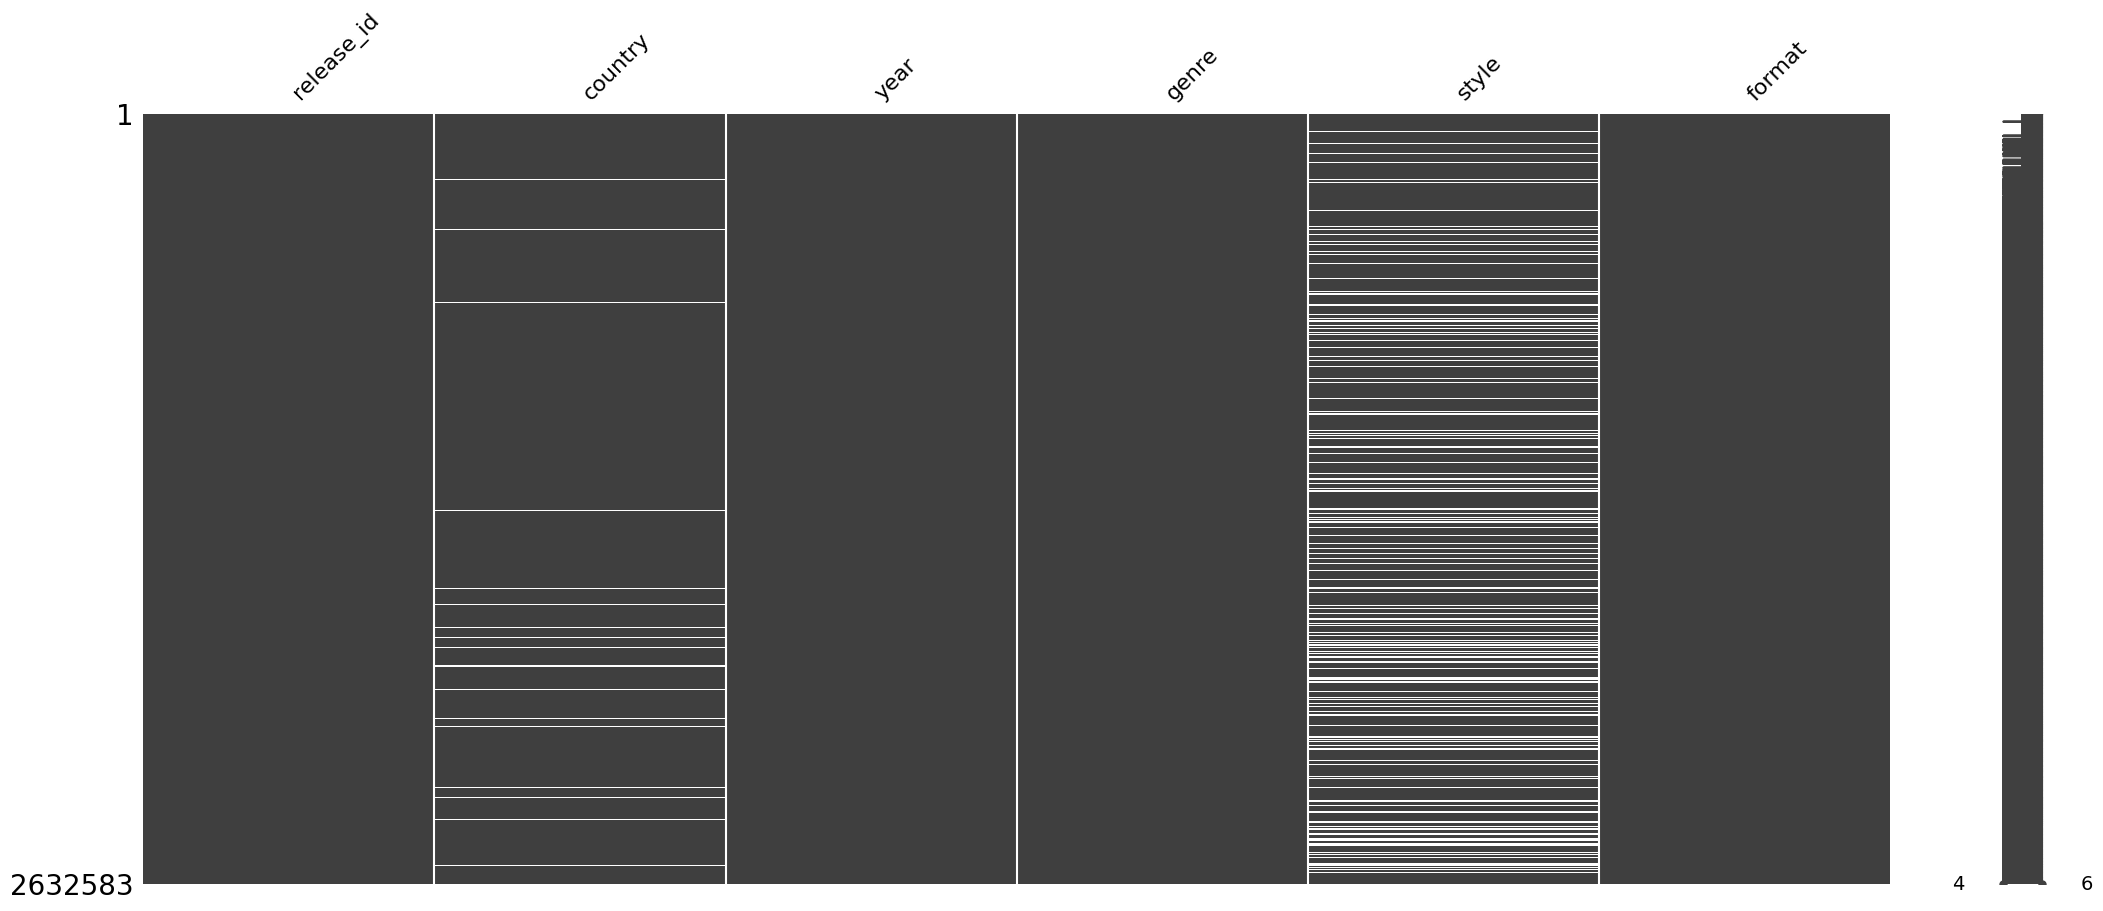

In [ ]:
print(data_c_dedu.isna().sum())
msno.matrix(data_c_dedu)
plt.show()

In [ ]:
# Combining data frame for vinyls and CD and collext the required info.
data_v_sorted=data_v_dedu[['year', 'format']].groupby(by='year').count()
data_v_sorted.columns=['vinyl']
data_v_sorted=data_v_sorted.reset_index()
data_c_sorted=data_c_dedu[['year', 'format']].groupby(by='year').count()
data_c_sorted.columns=['CD']
data_c_sorted=data_c_sorted.reset_index()

In [ ]:
data_v_c=pd.merge(data_v_sorted, data_c_sorted, how='inner')
data_v_c['year']=data_v_c['year'].astype('int')
print(data_v_c)

    year  vinyl      CD
0   2000  53970  148730
1   2001  56417  152220
2   2002  54920  154569
3   2003  53890  158510
4   2004  52868  160395
5   2005  50617  165640
6   2006  47845  168719
7   2007  45816  165118
8   2008  43600  157706
9   2009  43002  145387
10  2010  43360  133979
11  2011  46286  127099
12  2012  52312  123323
13  2013  58630  117669
14  2014  62614  112915
15  2015  63657  105032
16  2016  69196  100017
17  2017  72601   93325
18  2018  76070   78914
19  2019  76406   63316


## 👷 Data preparation or Feature Engineering

### Plot the data to see the released vinyl and CD were changing

---

\in time from 2000 to 2019.


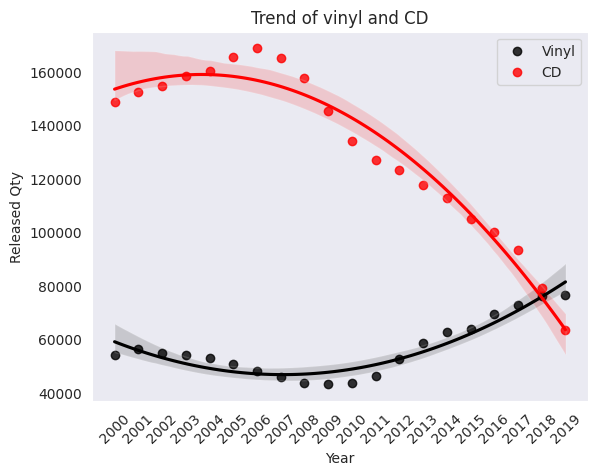

In [ ]:
data_v_c.rename(columns={'cassette': 'CD'}, inplace=True)

sns.set_style('dark')
g1 = sns.regplot(data=data_v_c, x='year', y='vinyl', order=2, ci=95, label='Vinyl', color='black')
g2 = sns.regplot(data=data_v_c, x='year', y='CD', order=2, ci=95, label='CD', color='red')  # Changed to 'CD'
g1.set_title('Trend of vinyl and CD', y=1)  # Changed title
g1.set(xlabel='Year', ylabel='Released Qty', xticks=list(range(2000, 2020)))
plt.xticks(rotation=44)
plt.legend()
sns.set_context("paper")
plt.show()

In [ ]:
# Correlation
corr_v_c=data_v_c[['vinyl', 'CD']].corr()
print(corr_v_c)

          vinyl        CD
vinyl  1.000000 -0.839542
CD    -0.839542  1.000000


A negative correlation means that as one variable increases, the other tends to decrease. In other words, there's an inverse relationship between the variables.

### In order to forecast by polynomial regression, here adds a column for the sqare of years. Then, plot the regression line to know how many vinyl and CD may be released in the next 5 years.

In [ ]:
data_v_c['year2']=data_v_c['year']**2
outcome_v=smf.ols('vinyl ~ year + year2', data=data_v_c).fit()
outcome_c=smf.ols('CD ~ year + year2', data=data_v_c).fit()
print(outcome_v.params)
print(outcome_c.params)

Intercept    9.857560e+08
year        -9.822266e+05
year2        2.446891e+02
dtype: float64
Intercept   -1.632259e+09
year         1.629425e+06
year2       -4.066092e+02
dtype: float64


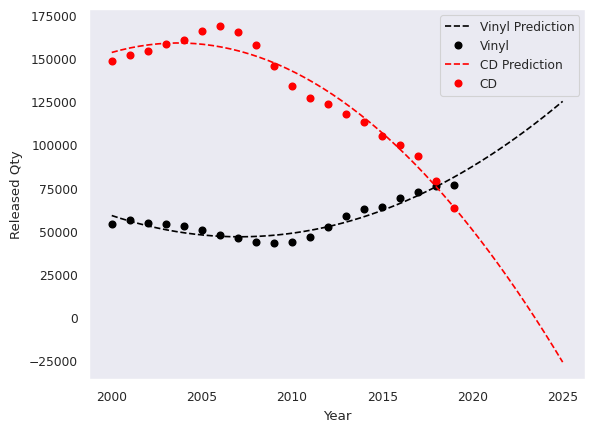

In [ ]:
df1=pd.DataFrame()
df1['year']=np.linspace(2000, 2025)
df1['year2']=df1['year']**2
predict_v=outcome_v.predict(df1)
plt.plot(df1['year'], predict_v, label='Vinyl Prediction', linestyle='--', color='black')
plt.plot(data_v_c['year'], data_v_c['vinyl'], 'o', alpha=1, label='Vinyl', color='black')
df2=pd.DataFrame()
df2['year']=np.linspace(2000, 2025)
df2['year2']=df2['year']**2
predict_c=outcome_c.predict(df2)
plt.plot(df2['year'], predict_c, label='CD Prediction', linestyle='--', color='red')
plt.plot(data_v_c['year'], data_v_c['CD'], 'o', alpha=1, label='CD', color='red')
plt.xlabel('Year')
plt.ylabel('Released Qty')
plt.legend()
plt.show()

In [ ]:
corr_v_c = data_v_c[['vinyl', 'CD']].corr()
print(corr_v_c)

          vinyl        CD
vinyl  1.000000 -0.839542
CD    -0.839542  1.000000


## 📊 Analysis of Results and Conclusions

The number of records for vinyls are increasing, although the number of CDs are decreasing.
there's an inverse relationship between the variables vinyls and CDs.

Vinyls is increasing the quantities released exponential.

CDs are not expecting to be selling anymore. People are preferring vinyls collectionist or media than CDs.




## 💡 Proposals and Ideas

Type of styles for vinyls and CD per year.

Analisys vinyls & media files.


## 📖 References

Discogs dataset Kaggle

Hands-On Machine Learning with Scikit-Learn, Keras & Tensor Flow (O'Reilly)

Practical Statistics for Data Scientist (O'Reilly)

Data Science Bootcamp Lessons (City of London)